## Part 1 - NBA Player Comparision

In [1]:
# As usual, we begin by importing the packages we will need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The data consists of the shot log for the NBA season 2016/17

shot = pd.read_csv("Assignment Data/Week 3/NBA shotlog_16_17.csv")
pd.set_option('display.max_columns', 100)
print(shot.columns.tolist())
shot.describe()

['self_previous_shot', 'player_position', 'home_game', 'location_x', 'opponent_previous_shot', 'home_team', 'shot_type', 'points', 'away_team', 'location_y', 'time', 'date', 'shoot_player', 'time_from_last_shot', 'quarter', 'current_shot_outcome']


,location_x,points,location_y,time_from_last_shot,quarter
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383
std,345.063654,0.464965,111.02320,19.797357,1.136841
min,0.000000,2.000000,0.00000,0.000000,1.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000


From the print() command we have a good deal of information on each shot, including the name of the player, the type of shot, team names, time in the game and so on. From the .describe() we can see that there are over 210,000 shots in the data although there is a small number of shots with missing coordinates (around 400). Also note that the x-axis location variable (this is the sideline) ranges from 0 to 993, while the y-axis variable (this is the baseline) runs from 0 to 500.


The dimensions of the court defined by the NBA are 94 feet by 50 feet. We can specify that ratio using figsize = (a,b). Note that we can also scale this to control the size of the plot in our window (we divide both the x and y figsize by 6).

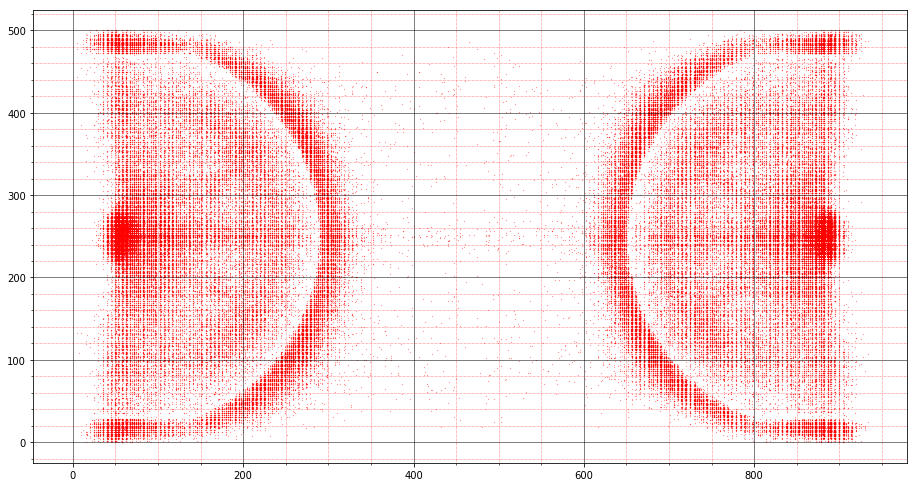

In [4]:
# A simple plot of coordinates, scaled for court dimensions and with grid added.

x = shot['location_x']
y = shot['location_y']

plt.figure(figsize=(94/6,50/6))
plt.scatter(x,y, s=.1,c='r', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')

Rather than look at both ends of the court, we can just look at one half of the court by fixing the range of the x axis using plt.xlim, which we set to cover the right hand half court. Note that to maintain the same dimensions we also need to halve the x axis on figsize (to 94/12 rather than 94/6).

(466.5, 933)

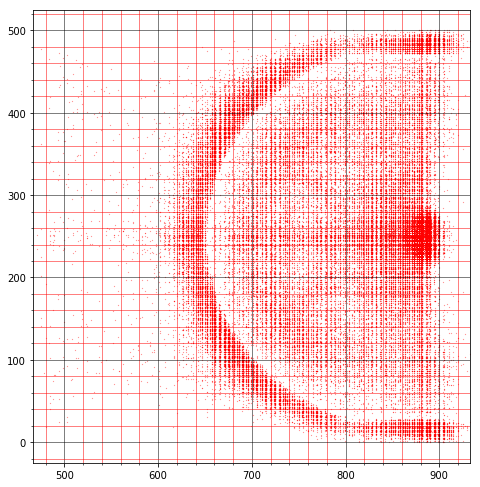

In [5]:
# The right hand half court

plt.figure(figsize=(94/12,50/6))
plt.scatter(x,y, s=.1,c='r', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linewidth='.5', color='black')
plt.grid(which='minor', linewidth='.5', color='red')
plt.xlim(933/2, 933)

The last plot just shows us one half of the court. To include both halves but show only the half court, we can convert the coordinates from the left hand half court so that they have the same relative location on the right hand half court (of course, there should be no real difference in performance based on which end of the court the player is attacking, and the two halves are mirror images of each other).

We can convert the plot to show shots from both ends on a half court if we adjust the coordinates. The x-axis runs from 0 to 933, so if we want to just show the right hand half court with all shots, we can recode the location_x variables, where x is less the 933/2 (the left had half court) as equal to "933 - location_x". This produces a mirror image of the x coordinate in the right hand half of the court. However, since the direction toward the basket is the reverse of the other half court, we need to take the mirror image of the y coordinate for shots in the left had half court - that is "500 - location_y".

The following code (which works like an "if" statement in Excel) creates these mirror images:

In [6]:
shot['halfcourt_x'] =np.where(shot['location_x'] < 933/2, 933 - shot['location_x'],shot['location_x'])
shot['halfcourt_y'] =np.where(shot['location_x'] < 933/2, 500 - shot['location_y'],shot['location_y'])
shot.describe()

,location_x,points,location_y,time_from_last_shot,quarter,halfcourt_x,halfcourt_y
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000,209675.000000,209675.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383,799.731480,250.303947
std,345.063654,0.464965,111.02320,19.797357,1.136841,89.606222,111.024160
min,0.000000,2.000000,0.00000,0.000000,1.000000,468.000000,0.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000,720.000000,197.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000,841.000000,250.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000,878.000000,303.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000,933.000000,500.000000


Note that the sideline coordinates now only run between 468 and 933, but that the baseline coordinates still run between 0 and 500, even though all the y locations have been changed. We can now plot the half court data, noting that we now halve the x axis in figsize, to preserve the same proportions as before.

Text(0.5, 1.0, 'Shots')

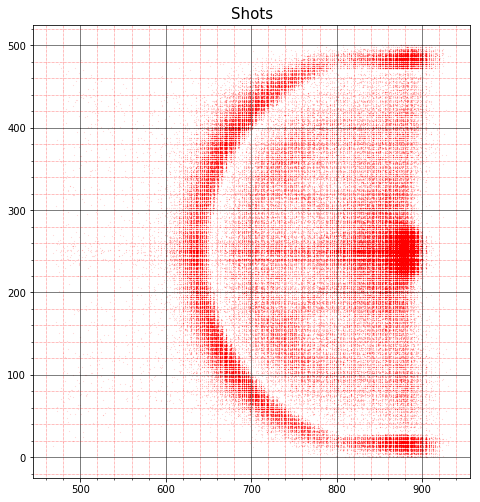

In [7]:
# all shots shown on a half court

hx = shot['halfcourt_x']
hy = shot['halfcourt_y']
plt.figure(figsize=(94/12,50/6))
plt.scatter(hx,hy, s=.01,c='r', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.title("Shots", fontsize = 15)

In [8]:
# Creating subsets for each player

Westbrook = shot[shot['shoot_player']=='Russell Westbrook']
Durant = shot[shot['shoot_player']=='Kevin Durant']
Jordan = shot[shot['shoot_player']=='DeAndre Jordan']
Howard = shot[shot['shoot_player']=='Dwight Howard']
Brook = shot[shot['shoot_player']=='Brook Lopez']
Robin = shot[shot['shoot_player']=='Robin Lopez']

## Westbrook - Durant Comparision

Text(0.5, 1.0, 'Durant')

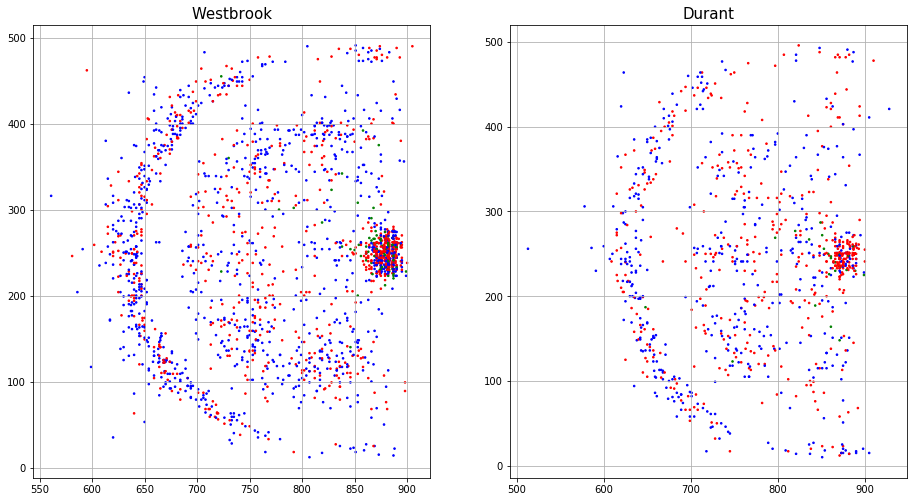

In [9]:
# Westbrook and Durant side by side

hxW = Westbrook['halfcourt_x']
hyW = Westbrook['halfcourt_y']

hxD = Durant['halfcourt_x']
hyD = Durant['halfcourt_y']


f = plt.figure(figsize=(94/6,50/6))

ax = f.add_subplot(121)
colors = np.where(Westbrook['current_shot_outcome']=='SCORED','r',np.where(Westbrook['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxW,hyW, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Westbrook", fontsize = 15)

ax = f.add_subplot(122)
colors = np.where(Durant['current_shot_outcome']=='SCORED','r',np.where(Durant['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxD,hyD, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Durant", fontsize = 15)

## Jordan - Howard Comparision

Text(0.5, 1.0, 'Howard')

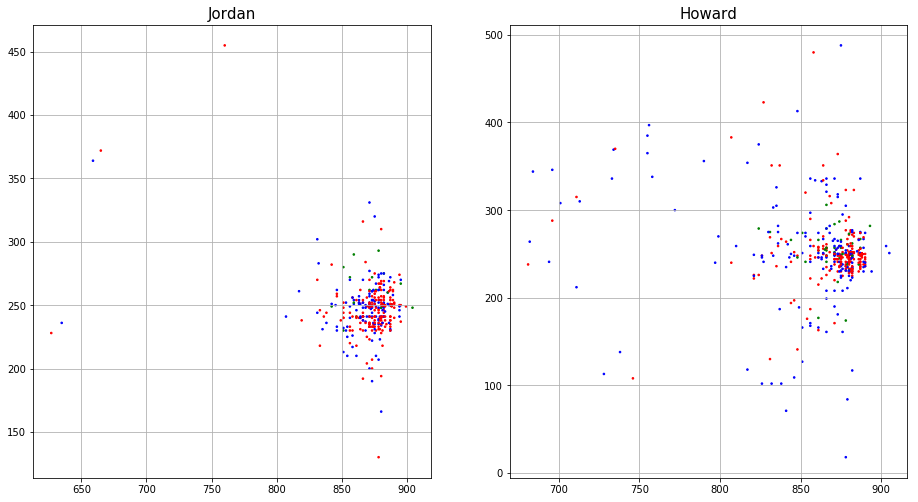

In [10]:
# Jordan and Howard side by side

hxJ = Jordan['halfcourt_x']
hyJ = Jordan['halfcourt_y']

hxH = Howard['halfcourt_x']
hyH = Howard['halfcourt_y']


f = plt.figure(figsize=(94/6,50/6))

ax = f.add_subplot(121)
colors = np.where(Jordan['current_shot_outcome']=='SCORED','r',np.where(Jordan['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxJ,hyJ, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Jordan", fontsize = 15)

ax = f.add_subplot(122)
colors = np.where(Howard['current_shot_outcome']=='SCORED','r',np.where(Howard['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxH,hyH, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Howard", fontsize = 15)

## Lopez - Lopez Comparision

Text(0.5, 1.0, 'Robin')

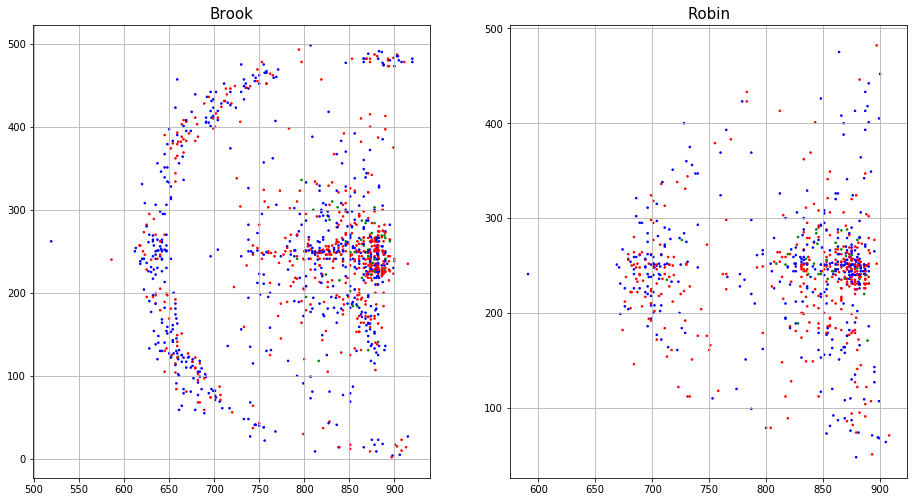

In [11]:
# Brook and Robin side by side

hxB = Brook['halfcourt_x']
hyB = Brook['halfcourt_y']

hxR = Robin['halfcourt_x']
hyR = Robin['halfcourt_y']


f = plt.figure(figsize=(94/6,50/6))

ax = f.add_subplot(121)
colors = np.where(Brook['current_shot_outcome']=='SCORED','r',np.where(Brook['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxB,hyB, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Brook", fontsize = 15)

ax = f.add_subplot(122)
colors = np.where(Robin['current_shot_outcome']=='SCORED','r',np.where(Robin['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxR,hyR, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Robin", fontsize = 15)

In [25]:
# Comparing players
# We use a pivot table here to list players by shots

mask = (shot['shoot_player']=='Russell Westbrook') | (shot['shoot_player']=='Kevin Durant') | (shot['shoot_player']=='DeAndre Jordan') | (shot['shoot_player']=='Dwight Howard') | (shot['shoot_player']=='Brook Lopez') | (shot['shoot_player']=='Robin Lopez')
playersn = shot[mask]
playersn.head(5)

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
1,MISSED,C,Yes,52.0,SCORED,ATL,Tip Dunk Shot,2,WAS,250.0,1:11,10/27/2016,Dwight Howard,2.0,1,SCORED,881.0,250.0
8,MISSED,C,Yes,107.0,SCORED,ATL,Turnaround Jump Shot,2,WAS,254.0,4:04,10/27/2016,Dwight Howard,3.0,1,MISSED,826.0,246.0
15,MISSED,C,Yes,62.0,MISSED,ATL,Jump Shot,2,WAS,329.0,7:36,10/27/2016,Dwight Howard,3.0,1,SCORED,871.0,171.0
17,MISSED,C,Yes,82.0,MISSED,ATL,Jump Bank Shot,2,WAS,373.0,8:22,10/27/2016,Dwight Howard,22.0,1,MISSED,851.0,127.0
39,MISSED,C,Yes,112.0,MISSED,ATL,Hook Shot,2,WAS,278.0,8:37,10/27/2016,Dwight Howard,125.0,2,SCORED,821.0,222.0


In [28]:
greatest_number_shots = playersn.groupby('shot_type')['away_team'].count().reset_index()
greatest_number_shots

,shot_type,away_team
0,Alley Oop Dunk,191
1,Alley Oop Layup,57
2,Cutting Dunk Shot,106
3,Cutting Finger Roll Layup Shot,10
4,Cutting Layup Shot,58
5,Driving Bank Hook Shot,1
6,Driving Bank Shot,24
7,Driving Dunk,76
8,Driving Finger Roll Layup,45
9,Driving Floating Bank Jump Shot,16
